<a href="https://colab.research.google.com/github/sanmati-rm/signLanguageRecognition/blob/master/Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the data from github repository. All the data can be viewed from the following repostitory: https://github.com/sanmati-rm/signLanguageRecognition.

In [ ]:
import pandas as pd
import io
import requests
url = "https://github.com/sanmati-rm/signLanguageRecognition/blob/master/sign_mnist_test.csv?raw=true"
url1="https://github.com/sanmati-rm/signLanguageRecognition/blob/master/sign_mnist_train.csv?raw=true"
s= requests.get(url).content
t= requests.get(url1).content
test= pd.read_csv(io.StringIO(s.decode('utf-8')))
train= pd.read_csv(io.StringIO(t.decode('utf-8')))

We are using American Sign Language letter database including 24 letters(excludind J and Z which invlove motion).If pictures are not visible please visit above mentioned github repo.

In [ ]:
from IPython.display import Image
urlImg1= "https://github.com/sanmati-rm/signLanguageRecognition/blob/master/amer_sign2.png"
Image(requests.get(urlImg1).content)

In [ ]:
urlImg2= "https://github.com/sanmati-rm/signLanguageRecognition/blob/master/amer_sign3.png"
Image(requests.get(urlImg2).content)

In [ ]:
urlImg3="https://github.com/sanmati-rm/signLanguageRecognition/blob/master/american_sign_language.png"
Image(requests.get(urlImg3).content)

Importing required libraries.

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Data pre-processing**

In [ ]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,202,206,208,212,214,217,219,220,222,226,227,227,228,231,231,231,230,231,233,163,169,171,174,179,185,190,194,198,203,208,...,70,71,73,69,64,56,51,56,41,216,255,255,186,189,191,197,205,211,216,219,232,205,147,137,118,99,79,75,78,77,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,138,139,138,138,139,138,139,139,139,139,138,138,138,137,136,135,134,134,134,139,137,138,139,139,138,140,140,141,142,142,...,79,116,126,121,109,79,70,171,183,179,180,179,173,174,176,177,179,179,179,179,174,179,196,178,160,147,114,94,92,120,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,152,155,162,165,168,177,140,170,181,182,185,188,189,191,192,192,194,195,195,108,40,81,100,105,111,113,145,154,130,160,...,177,220,215,218,220,222,222,224,227,227,227,228,104,108,113,119,128,142,154,213,201,186,172,155,148,129,107,84,154,223,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,191,191,191,191,190,190,189,189,189,189,186,186,185,184,183,182,183,98,60,171,175,179,182,185,187,188,190,193,193,193,...,90,108,120,118,124,123,119,123,121,113,98,67,130,130,130,129,131,124,156,237,230,185,154,161,155,126,110,93,92,119,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,189,188,187,187,186,185,184,184,183,180,180,180,178,179,178,176,174,173,172,189,189,190,192,191,191,192,192,191,190,189,...,32,22,18,21,181,208,201,199,198,199,198,199,210,215,210,94,78,71,81,41,22,45,47,41,39,40,39,39,24,24,13,53,200,204,201,201,193,175,178,156


In [ ]:
# View the dimensionality of the DataFrame.
train.shape

(27455, 785)

In [ ]:
# Load the train and test labels as numpy arrays.
y = train['label'].values
y_test = test['label'].values

In [ ]:
# Print the train and test labels and their dimensionality.
print('Train Labels:\n', y)
print('Shape of Labels:', y.shape)
print('Test Labels:\n', y_test)
print('Shape of Test Labels:', y_test.shape)

Train Labels:
 [ 3  6  2 ... 18 17 23]
Shape of Labels: (27455,)
Test Labels:
 [ 6  5 10 ...  2  4  2]
Shape of Test Labels: (7172,)


In [ ]:
x = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

print('Train Feature matrix:\n', x)
print('Train Shape of Feature matrix:', x.shape)
print('Test Feature matrix:\n', x_test)
print('Test Shape of Feature matrix:', x_test.shape)

Train Feature matrix:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
Train Shape of Feature matrix: (27455, 784)
Test Feature matrix:
 [[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]]
Test Shape of Feature matrix: (7172, 784)


Plotting the dataset to see the number of rows present for each alphabet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


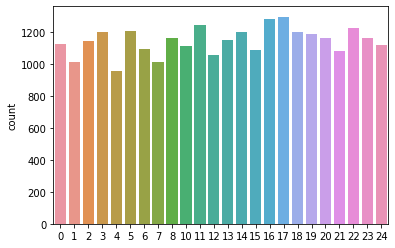

In [ ]:
import seaborn as sns

sns.countplot(x = y)
plt.show()

Converting one row of the dataset into a picture.

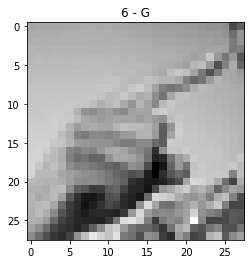

In [ ]:
plt.imshow(x[1].reshape(28,28), cmap='gray')
plt.title(str(y[1]) + ' - ' + chr(y[1] + ord('A')))
plt.show()

Since our target variables are categorical values we encode it as one hot vectors so as to easily compare it with the output of the neural network. We also normalize the data and divide the data into train and validation sets.

In [ ]:
num_classes = 26
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

In [ ]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation datasets (70-30 split).
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(19218, 784)
(8237, 784)
(19218, 26)
(8237, 26)


In [ ]:
x_train[0]

array([0.23137255, 0.38431373, 0.37254903, 0.10980392, 0.12156863,
       0.24705882, 0.25490198, 0.27450982, 0.29803923, 0.31764707,
       0.3529412 , 0.4117647 , 0.43529412, 0.45490196, 0.47058824,
       0.48235294, 0.49411765, 0.5058824 , 0.5176471 , 0.5254902 ,
       0.53333336, 0.5411765 , 0.5529412 , 0.5568628 , 0.5647059 ,
       0.5686275 , 0.57254905, 0.5764706 , 0.25882354, 0.39607844,
       0.35686275, 0.08627451, 0.14509805, 0.25490198, 0.2627451 ,
       0.2784314 , 0.30588236, 0.32156864, 0.35686275, 0.41568628,
       0.4392157 , 0.45882353, 0.47058824, 0.49411765, 0.5019608 ,
       0.50980395, 0.52156866, 0.5294118 , 0.5372549 , 0.5568628 ,
       0.5568628 , 0.5647059 , 0.5647059 , 0.5686275 , 0.5764706 ,
       0.5803922 , 0.30980393, 0.4117647 , 0.3372549 , 0.06666667,
       0.17254902, 0.25882354, 0.2627451 , 0.28235295, 0.30588236,
       0.3254902 , 0.36862746, 0.41960785, 0.4392157 , 0.46666667,
       0.48235294, 0.49803922, 0.50980395, 0.5176471 , 0.52156

In [ ]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# CNN with Keras



Using tensorflow backend

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.7MB/s 
     |████████████████████████████████| 144.4MB 79kB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
     |████████████████████████████████| 256kB 45.4MB/s 
     |████████████████████████████████| 921kB 45.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=5946b57ddb16490d233f692335de76edd50e9061285b1c050f5befa806faec9d
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0.

In [ ]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Loading the train and test dataset and sepearate into data and labels

In [ ]:
url = "https://github.com/sanmati-rm/signLanguageRecognition/blob/master/sign_mnist_test.csv?raw=true"
url1="https://github.com/sanmati-rm/signLanguageRecognition/blob/master/sign_mnist_train.csv?raw=true"
s= requests.get(url).content
t= requests.get(url1).content
test= pd.read_csv(io.StringIO(s.decode('utf-8')))
train= pd.read_csv(io.StringIO(t.decode('utf-8')))

y = train['label'].values
y_test = test['label'].values
x = (train.drop('label', axis = 1, inplace = False)).values
x_test = (test.drop('label', axis = 1, inplace = False)).values

Converting the labels into one-hot vectors

In [ ]:
num_classes = 26
y = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Normalizing the data and reshape to input expected by CNN

In [ ]:
x = x.astype('float32')
x_test = x_test.astype('float32')
x /=  255
x_test /= 255
x = x.reshape(x.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Splitting the data into train and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation datasets (70-30 split).
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 101)

Setting the hyperparameters of the model

In [ ]:
batch_size = 128
num_classes = 26
epochs = 10

Defining the network architecture by adding model layers and compiling them.

In [ ]:
model = Sequential()

# Add a 2D convolution layer with 64 filters, a 3 x 3 kernel and relu activation.
# Reference - https://keras.io/layers/convolutional/#conv2d
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))

# The convolution layer is followed by a maxpool layer with a 2 x 2 filter.
# Reference - https://keras.io/layers/pooling/#maxpooling2d
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another convolution layer with 64 filters, a 3 x 3 kernel and relu activation.
# Follow this with a maxpool layer with a 2 x 2 filter.
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a third convolution layer with 64 filters, a 3 x 3 kernel and relu activation.
# Follow this with a maxpool layer with a 2 x 2 filter.
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the input to the model.
# Reference - https://keras.io/layers/core/#flatten
model.add(Flatten())

# Add a dense layer with with output space as 128 and relu activation.
# Reference - https://keras.io/layers/core/#dense
model.add(Dense(128, activation = 'relu'))

# Add a droupout layer with 20% of the input units set to 0.
# Reference - https://keras.io/layers/core/#dropout
model.add(Dropout(0.20))

# Add a final dense layer with output as 26 classes and softmax activation.
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
# Compile the model with an Adam optimizer. Here, we will use the 'categorical_crossentropy' loss function.
# Accuracy is one of the metrics we are interested in
model.compile(loss = keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Print the model summary
model.summary()

ValueError: ignored

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=epochs, batch_size=batch_size)

RuntimeError: ignored

Plotting the accuracy over train and validation datasets

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

Plotting the loss over train and validation datasets

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
y_pred = model.predict(x_test)

y_pred

# Computing the accuracy on the test set

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model.

accuracy_score(y_test, y_pred.round())